# **🍷 Wine Quality**
## 1.0	Introductions 
UC Irvine Machine Learning Repository: http://archive.ics.uci.edu/ml/datasets/Wine+Quality
The data sets have 1599 rows of red wine and 4898 rows of white wine. Each wine sample has the following characteristics (columns):
1.	Fixed acidity
2.	Volatile acidity
3.	Citric acid
4.	Residual sugar
5.	Chlorides
6.	Free sulfur dioxide
7.	Total sulfur dioxide
8.	Density
9.	pH
10.	Sulphates
11.	Alcohol
12.	Quality (score between 0 and 10)


In [1]:
#Importing librarys
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, classification_report
from sklearn.model_selection import train_test_split

This dataset, created by merging two other datasets, contains observations on various red and white wine varieties, including their chemical properties and rankings by tasters. The goal is to model wine quality based on physicochemical tests.

In [2]:
#Loading datasets
red = pd.read_csv("C:\\Users\\eliez\\Desktop\\winequality-red.csv", sep=";")
white = pd.read_csv("C:\\Users\\eliez\\Desktop\\winequality-white.csv",sep=";")

#Creating a new columns for type
red['type'] = "red"
white['type'] = "white"

#Merging the two datasets
df = pd.concat([red, white], ignore_index=True)
print(df.head())

   fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   
3           11.2              0.28         0.56             1.9      0.075   
4            7.4              0.70         0.00             1.9      0.076   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   
1                 25.0                  67.0   0.9968  3.20       0.68   
2                 15.0                  54.0   0.9970  3.26       0.65   
3                 17.0                  60.0   0.9980  3.16       0.58   
4                 11.0                  34.0   0.9978  3.51       0.56   

   alcohol  quality type  
0      9.4        5  red  
1      9.8        5  red  
2    

## 2.0	Data Management and Data Visualization 
Summary statistics for exploring data

In [4]:
#Summary
print(df.describe())

#Null values
print(df.info())

       fixed acidity  volatile acidity  citric acid  residual sugar  \
count    6497.000000       6497.000000  6497.000000     6497.000000   
mean        7.215307          0.339666     0.318633        5.443235   
std         1.296434          0.164636     0.145318        4.757804   
min         3.800000          0.080000     0.000000        0.600000   
25%         6.400000          0.230000     0.250000        1.800000   
50%         7.000000          0.290000     0.310000        3.000000   
75%         7.700000          0.400000     0.390000        8.100000   
max        15.900000          1.580000     1.660000       65.800000   

         chlorides  free sulfur dioxide  total sulfur dioxide      density  \
count  6497.000000          6497.000000           6497.000000  6497.000000   
mean      0.056034            30.525319            115.744574     0.994697   
std       0.035034            17.749400             56.521855     0.002999   
min       0.009000             1.000000         

## 2.1 Data Visualization 

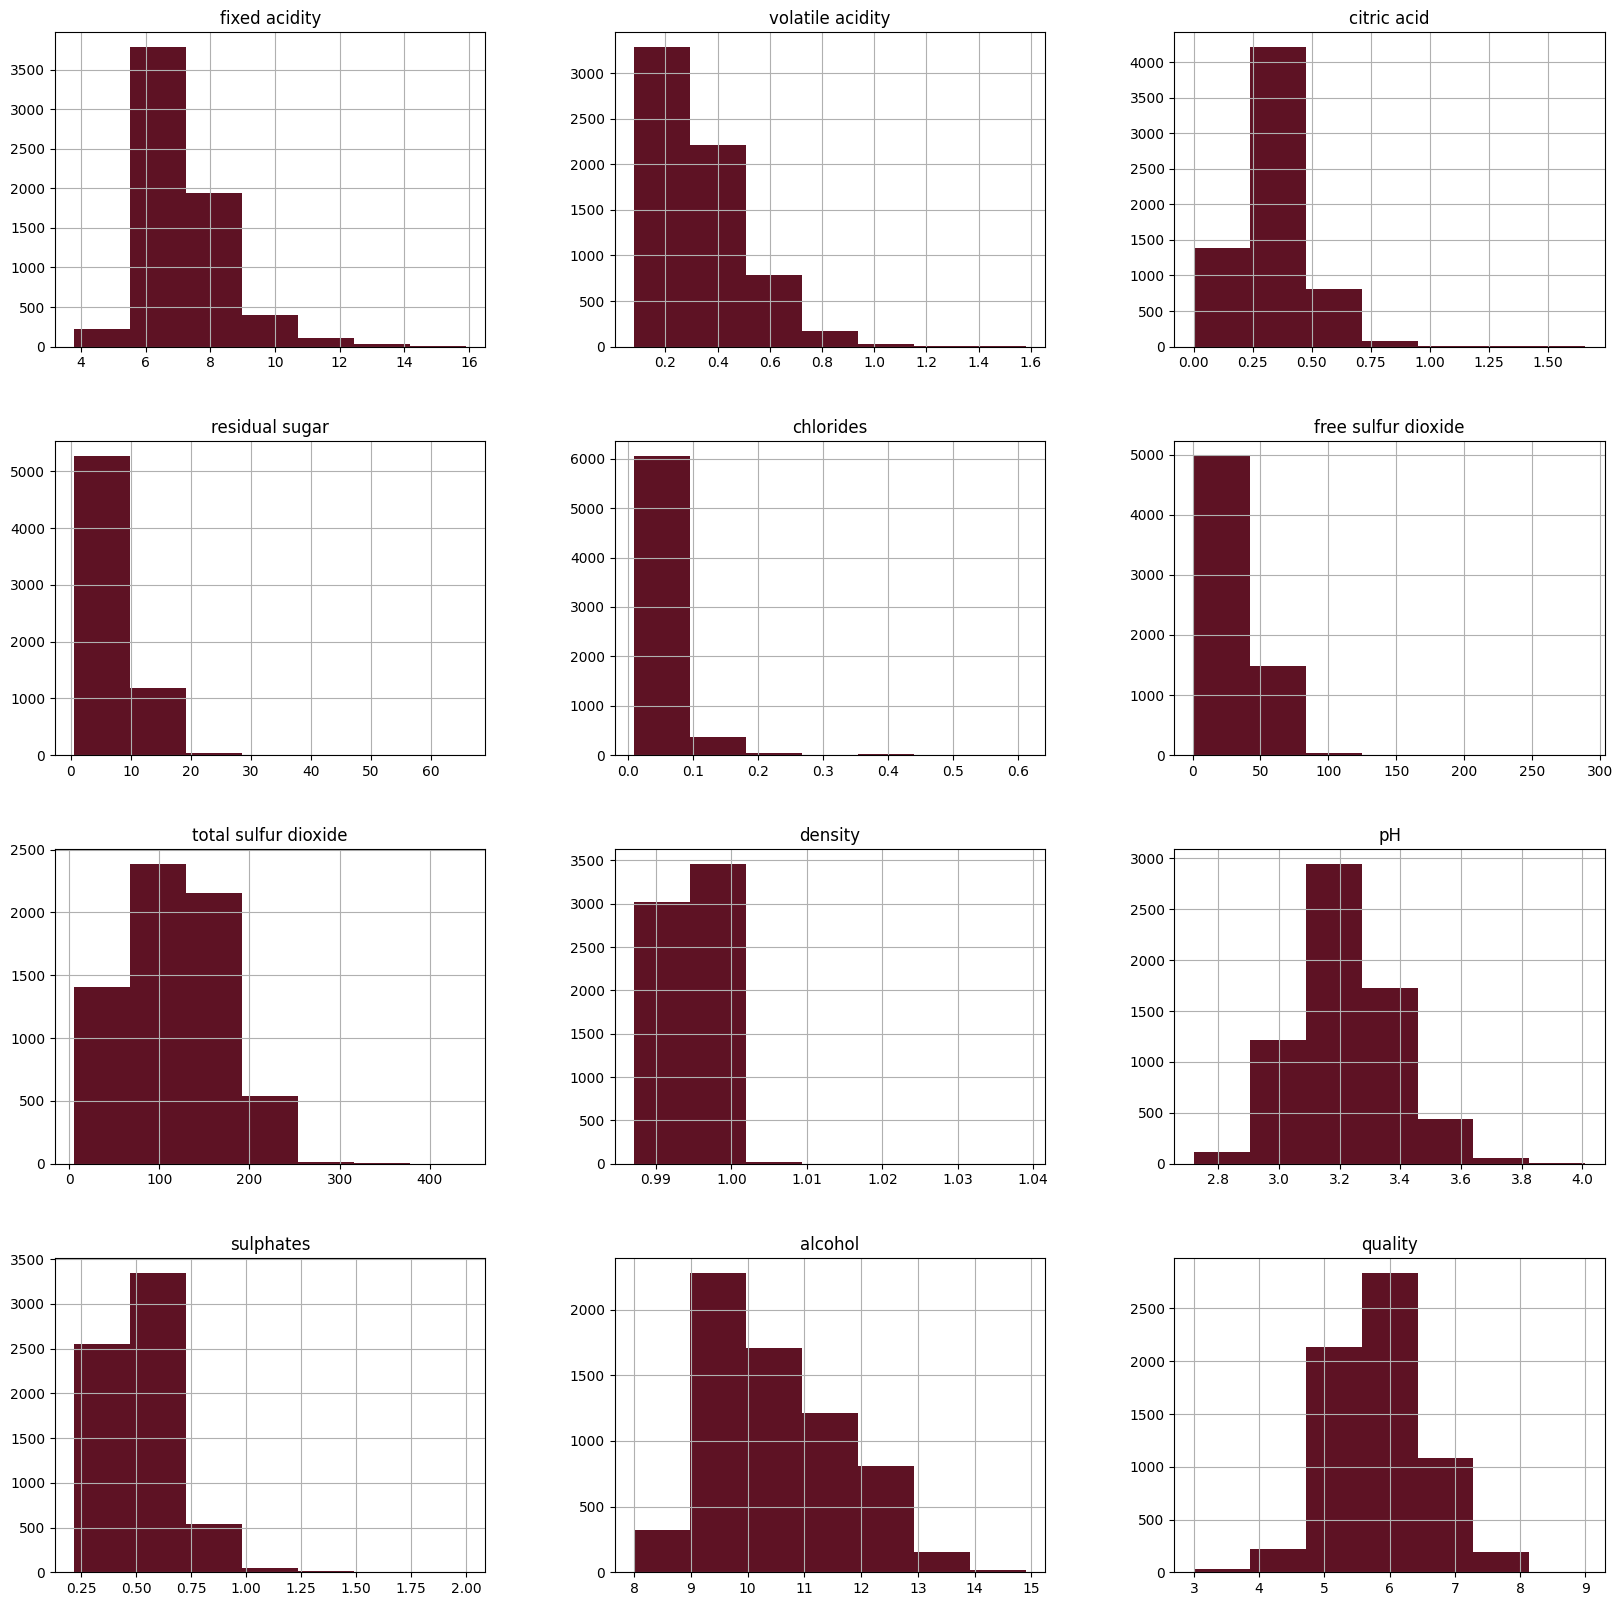

In [9]:
#histogram for distribution
df.hist(bins=7, figsize=(20,20), color='#5e1224')
plt.show()

The graphs are skewed in the positive direction, from which we can conclude that the distribution is concentrated on the left side of the graph.

         fixed acidity  volatile acidity  citric acid  residual sugar  \
quality                                                                 
3             7.853333          0.517000     0.281000        5.140000   
4             7.288889          0.457963     0.272315        4.153704   
5             7.326801          0.389614     0.307722        5.804116   
6             7.177257          0.313863     0.323583        5.549753   
7             7.128962          0.288800     0.334764        4.731696   
8             6.835233          0.291010     0.332539        5.382902   
9             7.420000          0.298000     0.386000        4.120000   

         chlorides  free sulfur dioxide  total sulfur dioxide   density  \
quality                                                                   
3         0.077033            39.216667            122.033333  0.995744   
4         0.060056            20.636574            103.432870  0.994833   
5         0.064666            30.237371   

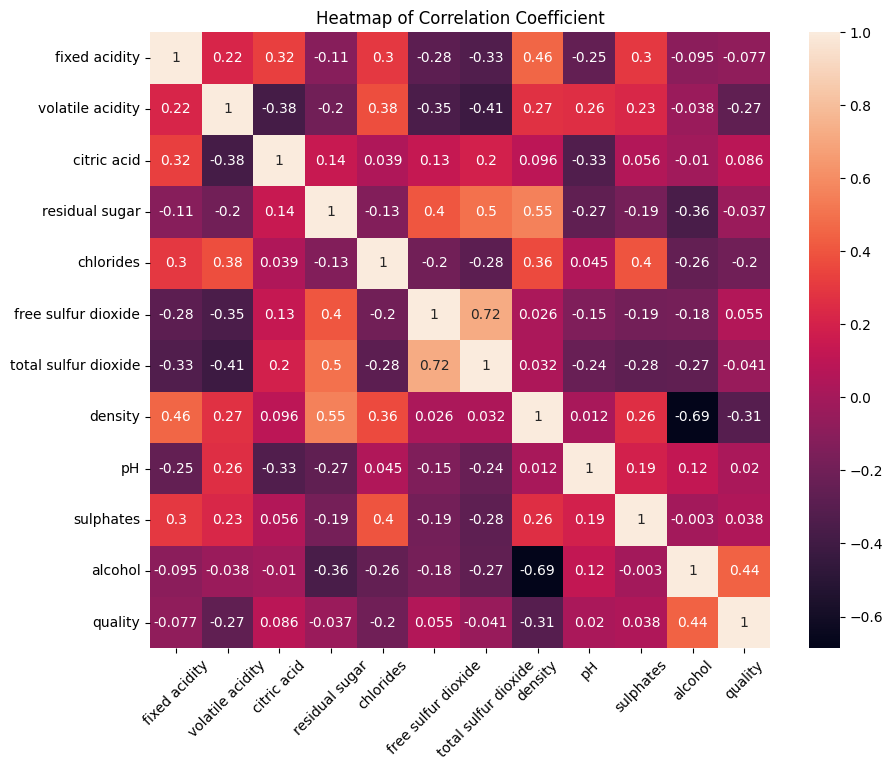

In [10]:
#selecting only numeric columns
numeric_columns = df.select_dtypes(include=['number'])

#grouping by quality and average scheduling
average = numeric_columns.groupby(df['quality']).mean()
print(average)

#heatmap for feature variables
corr = numeric_columns.corr()
plt.figure(figsize=[10,8])
sns.heatmap(corr, annot=True)
plt.xticks(rotation=45)
plt.title("Heatmap of Correlation Coefficient", size=12);

Among the features impacting Quality, Alcohol has the most positive effect with a coefficient of 0.44. In contrast, other features such as Volatile Acidity, Residual Sugar, and pH exhibit negative correlations or coefficients below 0.1, indicating a lesser or negative impact on Quality.

Let's evaluate the wine's ingredient list according to quality!

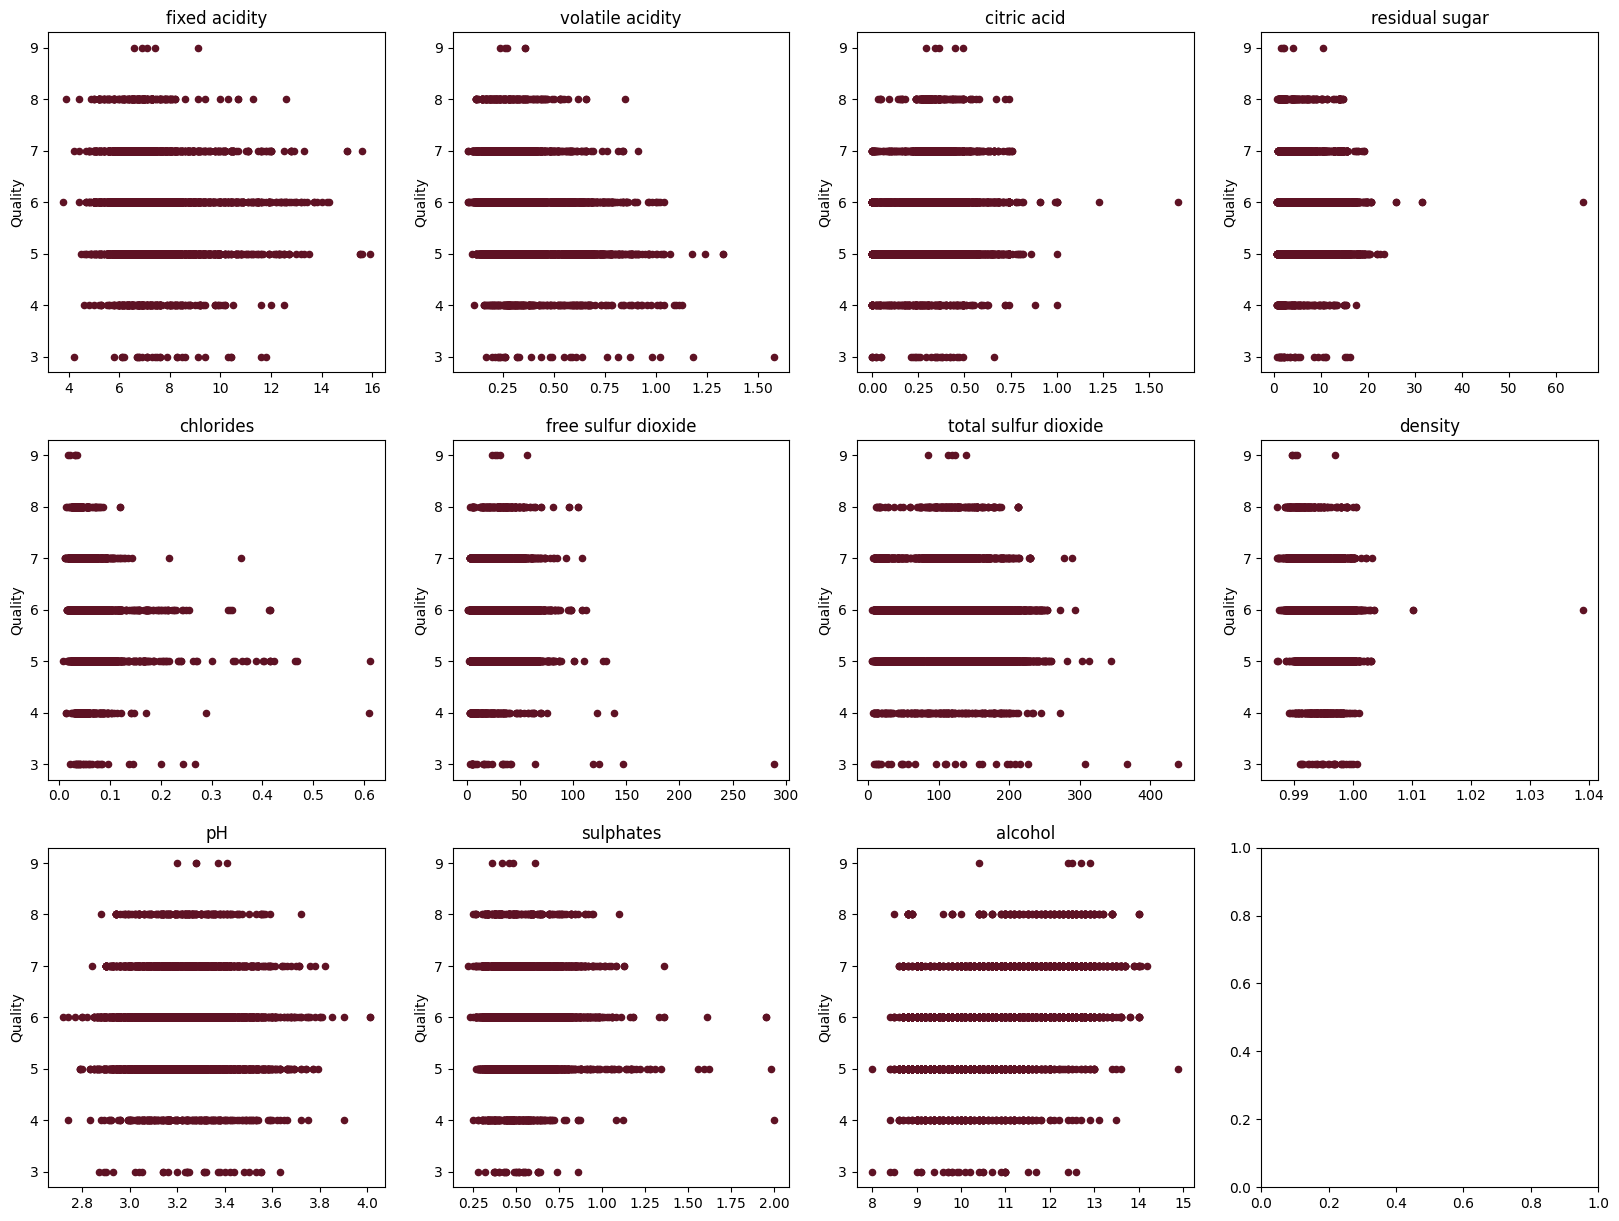

In [19]:
#impact of ingredient on quality
features = ['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar', 
            'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density', 
            'pH', 'sulphates', 'alcohol',]
color = '#5e1224'
#4x4
fig, axes = plt.subplots(nrows=3, ncols=4, figsize=(20, 15))
#drawing scatter plot
for ax, feature in zip(axes.flatten(), features):
    df.plot(y='quality', x=feature, kind='scatter', color=color, ax=ax)
    ax.set_title(feature)
    ax.set_xlabel('')
    ax.set_ylabel('Quality')


1. Fixed Acidity: There is no clear relationship between fixed acidity and quality. Quality scores are spread across different acidity levels.

2. Volatile Acidity: As volatile acidity increases, quality scores tend to remain low. Higher quality scores are found when volatile acidity levels are low.

3. Citric Acid: There is a slight trend where quality scores tend to increase as citric acid levels rise, but this relationship is not very strong.

4. Residual Sugar: There is no clear relationship between residual sugar levels and quality. Quality scores are distributed across various sugar levels.

5. Chlorides: There is no clear relationship between chloride levels and quality. Quality scores are spread across different chloride levels.

6. Free Sulfur Dioxide: There is no clear relationship between free sulfur dioxide levels and quality. Quality scores are distributed across these levels.

7. Total Sulfur Dioxide: There is no clear relationship between total sulfur dioxide levels and quality. Quality scores are spread across different levels of sulfur dioxide.

8. Density: There is no clear relationship between density and quality. Quality scores are distributed across different density levels.

9. pH: There is no clear relationship between pH levels and quality. Quality scores are spread across various pH levels.

10. Sulphates: There is a slight trend where quality scores tend to increase as sulphate levels rise, but this relationship is not very strong.

11. Alcohol: As alcohol levels increase, quality scores generally tend to increase. Higher alcohol levels are associated with higher quality scores.


## 3.0 Building Machine Learning Model

In [20]:
#separating independent and dependent variables
X = df[["quality"]]
y = df["quality"]

#splitting into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

print("X Train : ", X_train.shape)
print("X Test  : ", X_test.shape)
print("Y Train : ", y_train.shape)
print("Y Test  : ", y_test.shape)

X Train :  (4872, 1)
X Test  :  (1625, 1)
Y Train :  (4872,)
Y Test  :  (1625,)


## Creating a Decision Tree Model

In [21]:

wine_model = DecisionTreeClassifier(max_depth=10)
wine_model.fit(X_train,y_train)

#evaluating the model
print("Score on training data: ", wine_model.score(X_train, y_train))
print("Score on test data: ", wine_model.score(X_test, y_test))


Score on training data:  1.0
Score on test data:  1.0


In [23]:
#accuracy
y_pred_T =wine_model.predict(X_test)
print(" Model Evaluation Decision Tree : accuracy score " , accuracy_score(y_test,y_pred_T))


 Model Evaluation Decision Tree : accuracy score  1.0


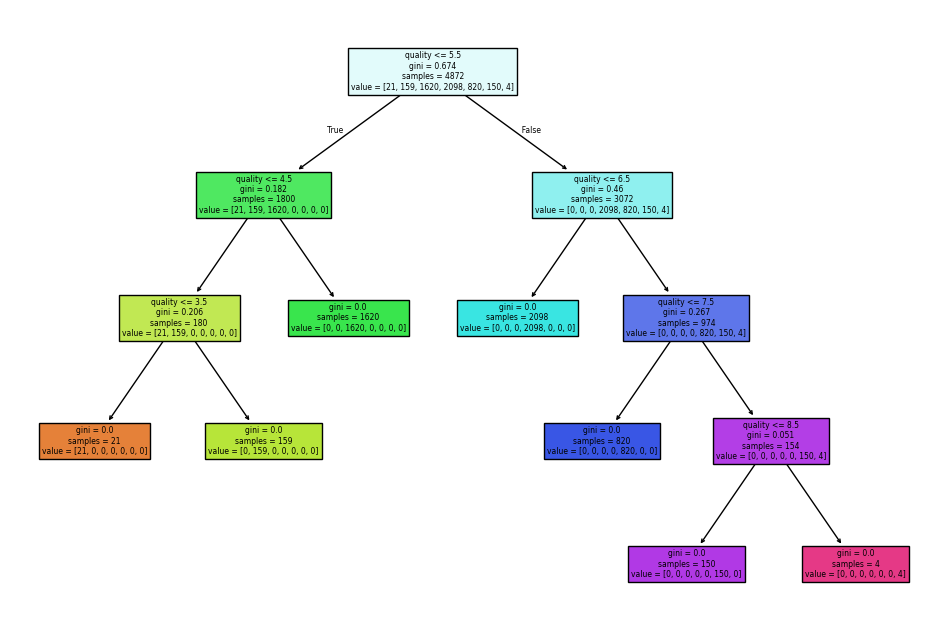

In [27]:
#plotting the decision tree
plt.figure(figsize=(12, 8))
tree.plot_tree(wine_model, feature_names=X.columns , filled=True)
plt.show()